### [ 과제 3 ]

#### 이번 과제에서는 CIFAR-10 dataset을 Convolutional Neural Network(CNN)를 사용하여 classify 해봅시다. 
#### 데이터를 받아올때는 tf.keras.datasets.cifar10.load_data 함수를 활용하시면 됩니다
#### (참고링크 : https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10). 
#### 활용할 기본프레임워크는 tensorflow로 하며, 그 외에 필요한 라이브러리는 자유롭게 사용하시면됩니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import copy
from IPython.display import Image, clear_output

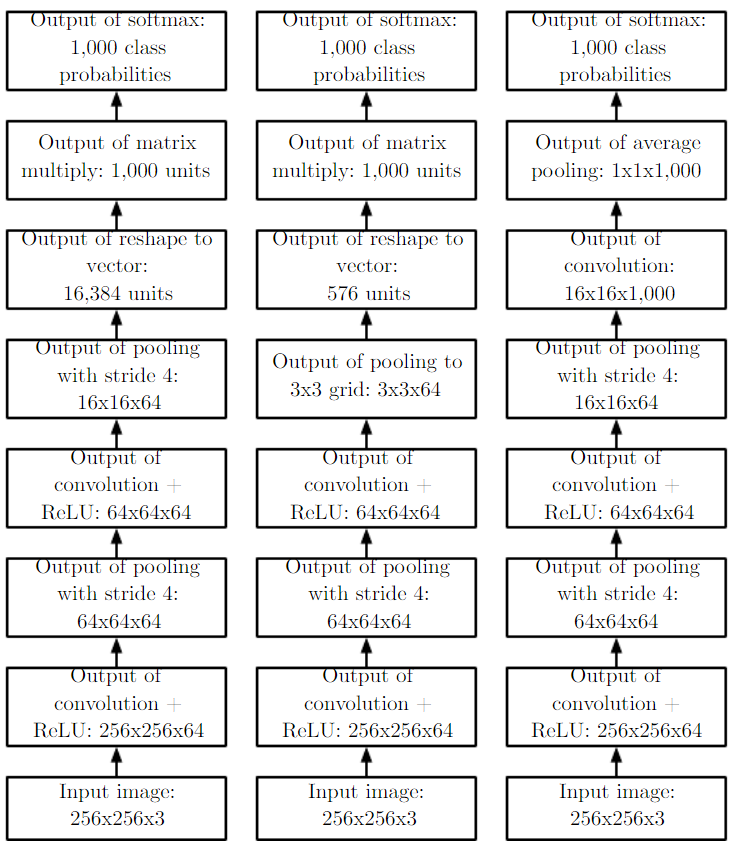

In [2]:
Image('./CNN과제.PNG')

=========================================================================================

1) 아래 세 가지 CNN모델을 구현(layer structure 유지)하고, 초기 shape이 (batch_size×256×256×3)인 tensor를 input으로 받았을때 각 layer를 통과할때 마다의 shape이 어떻게 변화하는 각 모델마다 print하여 보일 것 (shape 프린트 예시 아래에 첨부한 코드및 출력 참고. 해당코드는 CNN2.ipynb 파일명 으로 lms에 업로드 되어있음) (3점)

In [3]:
# Modeling ----------------------------------------------------------
# CNN_01
class CNN_01(tf.keras.Model):
    def __init__(self):
        super(CNN_01, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu)
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=10)

    def call(self, x, training=False, print_shape=False):
        input_data = x
        conv1 = self.conv1(input_data)
        pool1 = self.pool1(conv1)
        conv2 = self.conv2(pool1)
        pool2 = self.pool2(conv2)
        flatten = self.flatten(pool2)      
        output = self.dense1(flatten)
        
        if print_shape:
            print('-- Model_01 ---------')
            print(f'input: {input_data.shape}')
            print(f'conv1: {conv1.shape}')
            print(f'pool1: {pool1.shape}')
            print(f'conv2: {conv2.shape}')
            print(f'pool2: {pool2.shape}')
            print(f'flatten: {flatten.shape}')
            print(f'dnese1: {output.shape}')

        if not training:
            output = tf.nn.softmax(output)
            if print_shape:
                print(f'output: {output.shape}')
        return output


# CNN_02
class CNN_02(tf.keras.Model):
    def __init__(self):
        super(CNN_02, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu)
        # self.pool2

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=10)

    def call(self, x, training=False, print_shape=False):
        input_data = x
        conv1 = self.conv1(input_data)
        pool1 = self.pool1(conv1)
        conv2 = self.conv2(pool1)
        pool2, row_pool_seq, col_pool_seq = tf.nn.fractional_max_pool(conv2, [1.0, conv2.shape[1]/3, conv2.shape[2]/3, 1.0])
        flatten = self.flatten(pool2)      
        output = self.dense1(flatten)
        
        if print_shape:
            print('-- Model_02 ---------')
            print(f'input: {input_data.shape}')
            print(f'conv1: {conv1.shape}')
            print(f'pool1: {pool1.shape}')
            print(f'conv2: {conv2.shape}')
            print(f'pool2: {pool2.shape}')
            print(f'flatten: {flatten.shape}')
            print(f'dnese1: {output.shape}')

        if not training:
            output = tf.nn.softmax(output)
            if print_shape:
                print(f'output: {output.shape}')
        return output


# CNN_03
class CNN_03(tf.keras.Model):
    def __init__(self):
        super(CNN_03, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu)
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.conv3 = tf.keras.layers.Conv2D(1000, kernel_size=1)
        self.pool3 = tf.keras.layers.GlobalAveragePooling2D()
        self.dense1 = tf.keras.layers.Dense(units=10)

    def call(self, x, training=False, print_shape=False):
        input_data = x
        conv1 = self.conv1(input_data)
        pool1 = self.pool1(conv1)
        conv2 = self.conv2(pool1)
        pool2 = self.pool2(conv2)
        conv3 = self.conv3(pool2)
        pool3 = self.pool3(conv3)
        output = self.dense1(pool3)
        
        if print_shape:
            print('-- Model_03 ---------')
            print(f'input: {input_data.shape}')
            print(f'conv1: {conv1.shape}')
            print(f'pool1: {pool1.shape}')
            print(f'conv2: {conv2.shape}')
            print(f'pool2: {pool2.shape}')
            print(f'conv3: {conv3.shape}')
            print(f'pool3: {pool3.shape}')
            print(f'dnese1: {output.shape}')

        if not training:
            output = tf.nn.softmax(output)
            if print_shape:
                print(f'output: {output.shape}')
        return output

In [4]:
input_data = tf.random.uniform([100, 256, 256, 3])
input_data.shape

cnn_shape01 = CNN_01()
cnn_shape01(input_data, print_shape=True)
print()

cnn_shape02 = CNN_02()
cnn_shape02(input_data, print_shape=True)
print()

cnn_shape03 = CNN_03()
cnn_shape03(input_data, print_shape=True)
print()

-- Model_01 ---------
input: (100, 256, 256, 3)
conv1: (100, 256, 256, 64)
pool1: (100, 64, 64, 64)
conv2: (100, 64, 64, 64)
pool2: (100, 16, 16, 64)
flatten: (100, 16384)
dnese1: (100, 10)
output: (100, 10)

-- Model_02 ---------
input: (100, 256, 256, 3)
conv1: (100, 256, 256, 64)
pool1: (100, 64, 64, 64)
conv2: (100, 64, 64, 64)
pool2: (100, 3, 3, 64)
flatten: (100, 576)
dnese1: (100, 10)
output: (100, 10)

-- Model_03 ---------
input: (100, 256, 256, 3)
conv1: (100, 256, 256, 64)
pool1: (100, 64, 64, 64)
conv2: (100, 64, 64, 64)
pool2: (100, 16, 16, 64)
conv3: (100, 16, 16, 1000)
pool3: (100, 1000)
dnese1: (100, 10)
output: (100, 10)



=========================================================================================

2) 1에서 구현한 세 가지 CNN모델을 cifar-10 데이터를 classify하는 모델로 학습시키고 
그 결과를 비교 하여 best model 선정 할것. 선정근거도 간단히 한글로 서술. 
(학습시 train data의 20%를 validation data로 두고 early stopping을 사용해 
각 epoch에 대한 validation 데이터 error값을 그래프로 나타낼 것) (3점)

In [5]:
# cifar10 Data 
(x_train_val, y_train_val), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train_val.shape, y_train_val.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [6]:
# Normalize
print(f'x_train_data_range: ({np.min(x_train_val)}, {np.max(x_train_val)})')
x_train_val_normalize = x_train_val/255.
x_test_normalize = x_test/255.
print(f'normalized_x_train_data_range: ({np.min(x_train_val_normalize)}, {np.max(x_train_val_normalize)})')
print()

label_classes = np.unique(y_train_val)
n_label_classes = len(label_classes)
print(f'label_classes ({n_label_classes}): {label_classes}')

x_train_data_range: (0, 255)
normalized_x_train_data_range: (0.0, 1.0)

label_classes (10): [0 1 2 3 4 5 6 7 8 9]


In [7]:
# shuffle and train_valid_split
indices = np.random.permutation(x_train_val.shape[0])
train_indices = indices[:int(x_train_val.shape[0] * 0.8)]
valid_indices = indices[int(x_train_val.shape[0] * 0.8):]
print(indices[:10])     # indice Sample
print(train_indices.shape, valid_indices.shape)
print()

x_train = x_train_val_normalize[train_indices].astype('float32')
y_train = y_train_val[train_indices]

x_valid = x_train_val_normalize[valid_indices].astype('float32')
y_valid = y_train_val[valid_indices]

x_test_normalize = x_test_normalize.astype('float32')
y_test = y_test

print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test_normalize.shape, y_test.shape)
print()
print(f'x_train_data_range: ({np.min(x_train)}, {np.max(x_train)})')
print(f'x_valid_data_range: ({np.min(x_valid)}, {np.max(x_valid)})')
print(f'x_test_data_range: ({np.min(x_test_normalize)}, {np.max(x_test_normalize)})')
print()

[12587 32975 43727 14277 35676  3108 39424 29763 41206 34304]
(40000,) (10000,)

(40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1) (10000, 32, 32, 3) (10000, 1)

x_train_data_range: (0.0, 1.0)
x_valid_data_range: (0.0, 1.0)
x_test_data_range: (0.0, 1.0)



In [8]:
# dataset
n_batch = 256
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(x_train.shape[0]).batch(n_batch).prefetch(1)
valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).shuffle(x_valid.shape[0]).batch(n_batch).prefetch(1)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_normalize, y_test)).shuffle(x_test.shape[0]).batch(n_batch).prefetch(1)

In [9]:

# Model Learning 
class TrainningModel():
    # init
    def __init__(self, model_class):
        self.model = model_class
        self.epoch = 1
        self.best_epoch = None

    # reset
    def train_reset(self):
        TrainningModel(self.model)
        self.model_history = []

        self.train_loss_history = []
        self.valid_loss_history = []

        self.train_metrics_history = {}
        self.valid_metrics_history = {}

    # call
    def call(self):
        if self.best_model:
            return self.best_model
        else:
            return self.model

    # compile
    def compile(self, loss, optimizer=tf.optimizers.Adam(), metrics={}):
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = metrics

        self.train_reset()

        for metric in metrics:
            self.train_metrics_history[metric] = []
            self.valid_metrics_history[metric] = []

    # training
    @tf.function
    def training(self, X, y, model, optimizer, loss_fun):
        with tf.GradientTape() as Tape:
            train_pred = model(X, training=True)        # 전파
            train_loss = loss_fun(y_pred=train_pred, y_true=y)  # Loss값
        gradients = Tape.gradient(train_loss, model.trainable_variables)        # 역전파 → Gradient
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))    # weight update
        return {'pred':train_pred, 'loss': tf.reduce_mean(train_loss), 'gradients': gradients}

    # fit
    def fit(self, train_dataset, valid_dataset=False, max_epochs=1000, early_stopping=0, learning_display='log'):
        if learning_display == 'log':
            display_learning = (np.logspace(0, 5, 41).astype(int))[2:]
        else:
            display_learning = learning_display
        
        early_stop_patience = 0
        minimum_loss = np.inf
        loop_break = False
        start_epoch = self.epoch
        end_epoch = start_epoch + max_epochs - 1

        for epoch in range(start_epoch, end_epoch+1):
            # Evaluation temp list & object
            train_loss_temp = []
            train_metrics_temp = {}

            valid_loss_temp = []
            valid_accuracy_temp = []
            valid_metrics_temp = {}

            for metric in self.metrics:
                train_metrics_temp[metric] = []
                valid_metrics_temp[metric] = []

            # model learning
            for x_train_batch, y_train_batch in train_dataset:
                train_result = self.training(X=x_train_batch, y=y_train_batch, model=self.model, 
                                optimizer=self.optimizer, loss_fun=self.loss)
                train_loss_temp.append(train_result['loss'].numpy())

                train_pred_result = np.argmax(train_result['pred'].numpy(), axis=1)
                for metric in self.metrics:
                    train_metric_result = self.metrics[metric](y_pred=train_pred_result, y_true=y_train_batch)
                    train_metrics_temp[metric].append(train_metric_result.numpy())
            
            self.train_loss_history.append(np.mean(train_loss_temp))
            for metric in self.metrics:
                self.train_metrics_history[metric].append(np.mean(train_metrics_temp[metric]))


            # validation
            if valid_dataset:
                for x_valid_batch, y_valid_batch in valid_dataset:
                    valid_pred = self.model(x_valid_batch, training=False)      # 전파
                    valid_loss = self.loss(y_pred=valid_pred, y_true=y_valid_batch) # Loss
                    valid_loss_temp.append(valid_loss.numpy())

                    valid_pred_result = np.argmax(valid_pred.numpy(), axis=1)
                    for metric in self.metrics:
                        valid_metric_result = self.metrics[metric](y_pred=valid_pred_result, y_true=y_valid_batch)
                        valid_metrics_temp[metric].append(valid_metric_result.numpy())

                self.valid_loss_history.append(np.mean(valid_loss_temp))
                for metric in self.metrics:
                    self.valid_metrics_history[metric].append(np.mean(valid_metrics_temp[metric]))

            self.model_history.append(copy.deepcopy(self.model))

            # early_stoping
            if valid_dataset and epoch>=2 and early_stopping:
                if self.valid_loss_history[-1] > minimum_loss:
                    early_stop_patience += 1
                else:
                    self.best_epoch = epoch
                    self.best_model = self.model_history[self.best_epoch-1]
                    minimum_loss = self.valid_loss_history[-1]

                if early_stop_patience >= early_stopping:
                    loop_break = True

            # display
            if epoch-1 not in display_learning and self.valid_loss_history[-1] > minimum_loss:
                print(f'epoch: {format(self.best_epoch, "5d")}, train_loss: {format(self.train_loss_history[self.best_epoch-1], ".2f")}',end='')
                if valid_dataset:    
                    print(f', valid_loss: {format(self.valid_loss_history[self.best_epoch-1], ".2f")}',end='')
                for metric in self.metrics:
                    print(f', train_{metric}: {format(self.train_metrics_history[metric][self.best_epoch-1], ".2f")}',end='')
                    if valid_dataset:
                        print(f', valid_{metric}: {format(self.valid_metrics_history[metric][self.best_epoch-1], ".2f")}',end='')
                print(' *', end='')
                if loop_break:
                    print(f' best model', end='')
                print()

            if epoch == end_epoch or epoch in display_learning or loop_break:
                print(f'epoch: {format(epoch, "5d")}, train_loss: {format(self.train_loss_history[-1], ".2f")}',end='')
                if valid_dataset:
                    print(f', valid_loss: {format(self.valid_loss_history[-1], ".2f")}',end='')
                
                for metric in self.metrics:
                    print(f', train_{metric}: {format(self.train_metrics_history[metric][-1], ".2f")}',end='')
                    if valid_dataset:
                        print(f', valid_{metric}: {format(self.valid_metrics_history[metric][-1], ".2f")}',end='')

                if loop_break:
                    print()
                    break
                print()
        self.epoch = epoch + 1

        self.evaluate_frame = pd.DataFrame()
        self.evaluate_frame['model'] = pd.Series(self.model_history)
        self.evaluate_frame['train_loss'] = pd.Series(self.train_loss_history)

        if valid_dataset:
            self.evaluate_frame['valid_loss'] = pd.Series(self.valid_loss_history)
        if self.metrics:
            train_metrics_df = pd.DataFrame(self.train_metrics_history)
            train_metrics_df.columns = ['train_'+metric for metric in self.metrics]
            self.evaluate_frame = pd.concat([self.evaluate_frame, train_metrics_df], axis=1)
            if valid_dataset:
                valid_metrics_df = pd.DataFrame(self.valid_metrics_history)
                valid_metrics_df.columns = ['valid_'+metric for metric in self.metrics]
                self.evaluate_frame = pd.concat([self.evaluate_frame, valid_metrics_df], axis=1)
        self.evaluate_frame.index = range(1, len(self.evaluate_frame)+1)
        self.evaluate_frame.index.name = 'epoch'

    # Model_Evaluate_Plot
    def evaluate_plot(self, title=''):
        plt.figure(figsize=(10,3))
        if self.metrics:
            plt.subplot(121)
        plt.title(f'{title} Loss')
        plt.plot(self.evaluate_frame.index, self.evaluate_frame['train_loss'], label='train')
        if self.valid_loss_history:
            plt.plot(self.evaluate_frame.index, self.evaluate_frame['valid_loss'], label='valid')
        if self.best_epoch:
            plt.plot(self.best_epoch, self.evaluate_frame['train_loss'][self.best_epoch], 'ro')
            plt.plot(self.best_epoch, self.evaluate_frame['valid_loss'][self.best_epoch], 'ro')
            plt.axvline(self.best_epoch, color='r', ls='--', alpha=0.5)
        plt.legend()
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

        if self.metrics:
            plt.subplot(122)
            plt.title(f'{title} Accuracy')
            plt.plot(self.evaluate_frame.index, (1 - self.evaluate_frame['train_accuracy']), label='train')
            if self.valid_loss_history:
                plt.plot(self.evaluate_frame.index, (1 - self.evaluate_frame['valid_accuracy']), label='valid')
            if self.best_epoch:
                plt.plot(self.best_epoch, (1 - self.evaluate_frame['train_accuracy'][self.best_epoch]), 'ro')
                plt.plot(self.best_epoch, (1 - self.evaluate_frame['valid_accuracy'][self.best_epoch]), 'ro')
                plt.axvline(self.best_epoch, color='r', ls='--', alpha=0.5)
            plt.legend()
            plt.xlabel('Epoch')
            plt.ylabel('Error: 1 - Accuracy')
        plt.show()

    # Evaluate Model
    def evaluate(self, test_dataset):
        if self.best_epoch:
            model = self.best_model    
        else:
            model = self.model

        test_loss_temp = []
        test_metrics_temp = {}
        for metric in self.metrics:
            test_metrics_temp[metric] = []

        for batch_test_x, batch_test_y in test_dataset:
            pred_test = model(batch_test_x, training=False)
            pred_test_result = np.argmax(pred_test.numpy(), axis=1)
            test_loss_temp.append(self.loss(y_pred=pred_test, y_true=batch_test_y))
            for metric in self.metrics:
                test_metrics_temp[metric].append(self.metrics[metric](y_pred=pred_test_result, y_true=batch_test_y))

        self.test_loss = np.mean(test_loss_temp)
        print(f'(Evaluate_Result) Loss: {format(self.test_loss, ".4f")}', end='')

        self.test_metrics = {}
        for metric in self.metrics:
            self.test_metrics[metric] = np.mean(test_metrics_temp[metric])
            print(f', {metric}: {format(self.test_metrics[metric], ".4f")}', end='')
        print()

epoch:     1, train_loss: 1.75, valid_loss: 2.11, train_accuracy: 0.27, valid_accuracy: 0.37
epoch:     2, train_loss: 1.39, valid_loss: 2.05, train_accuracy: 0.41, valid_accuracy: 0.44
epoch:     3, train_loss: 1.26, valid_loss: 2.02, train_accuracy: 0.46, valid_accuracy: 0.48
epoch:     4, train_loss: 1.17, valid_loss: 1.98, train_accuracy: 0.49, valid_accuracy: 0.50
epoch:     5, train_loss: 1.12, valid_loss: 1.95, train_accuracy: 0.51, valid_accuracy: 0.52
epoch:     7, train_loss: 1.03, valid_loss: 1.94, train_accuracy: 0.55, valid_accuracy: 0.55
epoch:     9, train_loss: 0.95, valid_loss: 1.91, train_accuracy: 0.57, valid_accuracy: 0.57 *
epoch:    10, train_loss: 0.93, valid_loss: 1.91, train_accuracy: 0.58, valid_accuracy: 0.58
epoch:    11, train_loss: 0.89, valid_loss: 1.88, train_accuracy: 0.59, valid_accuracy: 0.59 *
epoch:    11, train_loss: 0.89, valid_loss: 1.88, train_accuracy: 0.59, valid_accuracy: 0.59 *
epoch:    13, train_loss: 0.86, valid_loss: 1.88, train_accuracy

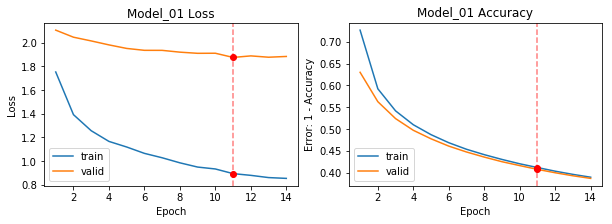

(Evaluate_Result) Loss: 1.8688, accuracy: 0.6135


In [10]:
# Model_01
prob2_cnn_01 = TrainningModel(CNN_01())
prob2_cnn_01.compile(optimizer = tf.optimizers.Adam(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob2_cnn_01.fit(train_dataset, valid_dataset, early_stopping=4)
prob2_cnn_01.evaluate_plot(title='Model_01')
prob2_cnn_01.evaluate(test_dataset)

epoch:     1, train_loss: 1.75, valid_loss: 2.10, train_accuracy: 0.28, valid_accuracy: 0.38
epoch:     2, train_loss: 1.39, valid_loss: 2.04, train_accuracy: 0.41, valid_accuracy: 0.44
epoch:     3, train_loss: 1.28, valid_loss: 2.00, train_accuracy: 0.46, valid_accuracy: 0.48
epoch:     4, train_loss: 1.18, valid_loss: 1.98, train_accuracy: 0.49, valid_accuracy: 0.50
epoch:     5, train_loss: 1.12, valid_loss: 1.96, train_accuracy: 0.51, valid_accuracy: 0.52
epoch:     7, train_loss: 1.03, valid_loss: 1.93, train_accuracy: 0.55, valid_accuracy: 0.55
epoch:    10, train_loss: 0.96, valid_loss: 1.89, train_accuracy: 0.58, valid_accuracy: 0.58
epoch:    10, train_loss: 0.96, valid_loss: 1.89, train_accuracy: 0.58, valid_accuracy: 0.58 *
epoch:    10, train_loss: 0.96, valid_loss: 1.89, train_accuracy: 0.58, valid_accuracy: 0.58 *
epoch:    13, train_loss: 0.92, valid_loss: 1.90, train_accuracy: 0.60, valid_accuracy: 0.60
epoch:    14, train_loss: 0.89, valid_loss: 1.89, train_accuracy: 

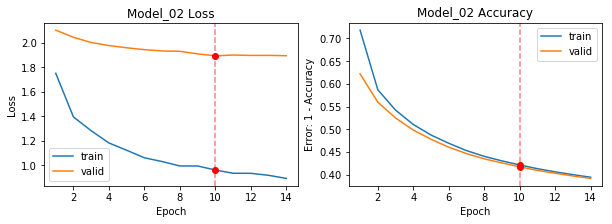

(Evaluate_Result) Loss: 1.8877, accuracy: 0.6084


In [11]:
# Model_02
prob2_cnn_02 = TrainningModel(CNN_02())
prob2_cnn_02.compile(optimizer = tf.optimizers.Adam(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob2_cnn_02.fit(train_dataset, valid_dataset, early_stopping=4)
prob2_cnn_02.evaluate_plot(title='Model_02')
prob2_cnn_02.evaluate(test_dataset)

epoch:     1, train_loss: 1.83, valid_loss: 2.15, train_accuracy: 0.23, valid_accuracy: 0.32
epoch:     2, train_loss: 1.48, valid_loss: 2.06, train_accuracy: 0.36, valid_accuracy: 0.39
epoch:     3, train_loss: 1.37, valid_loss: 2.04, train_accuracy: 0.41, valid_accuracy: 0.43
epoch:     4, train_loss: 1.30, valid_loss: 2.03, train_accuracy: 0.44, valid_accuracy: 0.45
epoch:     5, train_loss: 1.25, valid_loss: 2.00, train_accuracy: 0.46, valid_accuracy: 0.47
epoch:     7, train_loss: 1.18, valid_loss: 1.99, train_accuracy: 0.49, valid_accuracy: 0.50
epoch:     9, train_loss: 1.13, valid_loss: 1.95, train_accuracy: 0.51, valid_accuracy: 0.51 *
epoch:    10, train_loss: 1.12, valid_loss: 1.96, train_accuracy: 0.52, valid_accuracy: 0.52
epoch:    13, train_loss: 1.08, valid_loss: 1.94, train_accuracy: 0.54, valid_accuracy: 0.54
epoch:    14, train_loss: 1.06, valid_loss: 1.95, train_accuracy: 0.54, valid_accuracy: 0.55


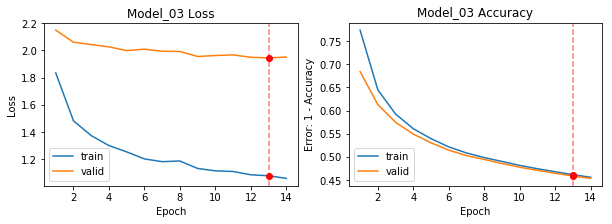

(Evaluate_Result) Loss: 1.9405, accuracy: 0.5470


In [12]:
# Model_03
prob2_cnn_03 = TrainningModel(CNN_03())
prob2_cnn_03.compile(optimizer = tf.optimizers.Adam(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob2_cnn_03.fit(train_dataset, valid_dataset, early_stopping=4)
prob2_cnn_03.evaluate_plot(title='Model_03')
prob2_cnn_03.evaluate(test_dataset)

#### → Best_Model (1번):
#### 다른 모델에 비해 Test_Loss가 가장 낮고 Test_Accuracy가 가장 높기 때문에 1번 모델을 best_model로 판단했다.

=========================================================================================

3) 1에서 학습시킨 세가지 CNN모델에, shape이 (batch_size×48×48×3)인 tensor를 
test input으로 사용할 수 있을지 생각해 보고, 그 근거를 간단히 한글로 서술. 
(임의의 tensor(다음과 같은 코드로 생성가능 “temp_input = tf.random.uniform([batch_size, 48, 48, 3])”)
를 input으로 직접 넣어 보고 결과를 확인해 봐도 됨) (2점)

In [13]:
random_tensor = tf.random.normal((10,48,48,3))
print(random_tensor.shape)

(10, 48, 48, 3)


In [14]:
try:
    result1 = prob2_cnn_01.best_model(random_tensor, print_shape=True)       # error
except:
    print('error')
print()

error



In [15]:
try:
    result2 = prob2_cnn_02.best_model(random_tensor, print_shape=True)       # OK
except:
    print('error')
print()

-- Model_02 ---------
input: (10, 48, 48, 3)
conv1: (10, 48, 48, 64)
pool1: (10, 12, 12, 64)
conv2: (10, 12, 12, 64)
pool2: (10, 3, 3, 64)
flatten: (10, 576)
dnese1: (10, 10)
output: (10, 10)



In [16]:
try:
    result3 = prob2_cnn_03.best_model(random_tensor, print_shape=True)       # OK
except:
    print('error')
print()

-- Model_03 ---------
input: (10, 48, 48, 3)
conv1: (10, 48, 48, 64)
pool1: (10, 12, 12, 64)
conv2: (10, 12, 12, 64)
pool2: (10, 3, 3, 64)
conv3: (10, 3, 3, 1000)
pool3: (10, 1000)
dnese1: (10, 10)
output: (10, 10)



####  ○ 1번 모델 : error - 학습시킨 모델과 Size가 달라서 flatten후에 feature의 길이가 달라지기 때문에 test_input으로 사용 불가
####  ○ 2번 모델 : OK - 학습시킨 모델과 size가 다르나 2번째 pooling(Fractional MaxPooling)에서 input사이즈와 무관하게 output size를 3 by 3으로 고정하기 때문에 flatten후에 feature의 길이가 같아져 test_input으로 사용가능
####  ○ 3번 모델 : OK - 학습시킨 모델과 size가 다르나 3번째 pooling(GlobalAveragePooling)에서 output size를 1개의 길이로 통합하여 출력하기 때문에 flatten후에 feature의 길이가 같아져 test_input으로 사용가능

=========================================================================================

 4) 2에서 선정한 best모델을 standard normal/Xavier normal/He normal을 통한
 initialization을 적용하여 학습시키고, 각각의 결과를 비교해 best initialization을
 선정할 것. 선정근거도 간단히 한글로 서술 (2점)

In [17]:
class CNN_01_Best(tf.keras.Model):
    def __init__(self, initializer=tf.initializers.RandomNormal(stddev=1)):
        super(CNN_01_Best, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, 
                kernel_initializer=initializer, padding='same', activation=tf.nn.relu)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, 
                kernel_initializer=initializer, padding='same', activation=tf.nn.relu)
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=10, kernel_initializer=initializer)

    def call(self, x, training=False, print_shape=False):
        input_data = x
        conv1 = self.conv1(input_data)
        pool1 = self.pool1(conv1)
        conv2 = self.conv2(pool1)
        pool2 = self.pool2(conv2)
        flatten = self.flatten(pool2)      
        output = self.dense1(flatten)
        
        if print_shape:
            print('-- Model_01 ---------')
            print(f'input: {input_data.shape}')
            print(f'conv1: {conv1.shape}')
            print(f'pool1: {pool1.shape}')
            print(f'conv2: {conv2.shape}')
            print(f'pool2: {pool2.shape}')
            print(f'flatten: {flatten.shape}')
            print(f'dnese1: {output.shape}')

        if not training:
            output = tf.nn.softmax(output)
            if print_shape:
                print(f'output: {output.shape}')
        return output

epoch:     1, train_loss: 198.40, valid_loss: 2.21, train_accuracy: 0.14, valid_accuracy: 0.19
epoch:     2, train_loss: 55.03, valid_loss: 2.17, train_accuracy: 0.22, valid_accuracy: 0.24
epoch:     3, train_loss: 35.80, valid_loss: 2.17, train_accuracy: 0.25, valid_accuracy: 0.26
epoch:     4, train_loss: 22.43, valid_loss: 2.26, train_accuracy: 0.26, valid_accuracy: 0.26
epoch:     5, train_loss: 3.28, valid_loss: 2.30, train_accuracy: 0.25, valid_accuracy: 0.23
epoch:     6, train_loss: 2.38, valid_loss: 2.30, train_accuracy: 0.22, valid_accuracy: 0.21


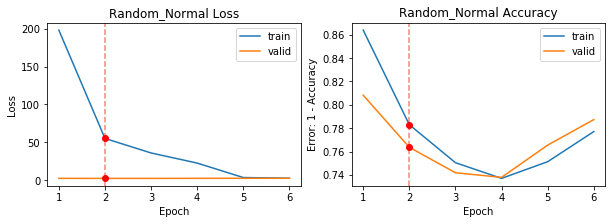

(Evaluate_Result) Loss: 2.1637, accuracy: 0.2124


In [18]:
# Standard_Normal : RandomNormal
prob4_cnn_stdno = TrainningModel(CNN_01_Best(initializer=tf.initializers.RandomNormal(stddev=1)))
prob4_cnn_stdno.compile(optimizer = tf.optimizers.Adam(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob4_cnn_stdno.fit(train_dataset, valid_dataset, early_stopping=4)
prob4_cnn_stdno.evaluate_plot(title='Random_Normal')
prob4_cnn_stdno.evaluate(test_dataset)

epoch:     1, train_loss: 1.73, valid_loss: 2.10, train_accuracy: 0.28, valid_accuracy: 0.39
epoch:     2, train_loss: 1.33, valid_loss: 2.02, train_accuracy: 0.43, valid_accuracy: 0.46
epoch:     3, train_loss: 1.20, valid_loss: 1.97, train_accuracy: 0.48, valid_accuracy: 0.50
epoch:     4, train_loss: 1.12, valid_loss: 1.97, train_accuracy: 0.51, valid_accuracy: 0.52
epoch:     5, train_loss: 1.06, valid_loss: 1.94, train_accuracy: 0.53, valid_accuracy: 0.54
epoch:     7, train_loss: 0.98, valid_loss: 1.92, train_accuracy: 0.57, valid_accuracy: 0.57
epoch:    10, train_loss: 0.91, valid_loss: 1.88, train_accuracy: 0.60, valid_accuracy: 0.60
epoch:    10, train_loss: 0.91, valid_loss: 1.88, train_accuracy: 0.60, valid_accuracy: 0.60 *
epoch:    13, train_loss: 0.86, valid_loss: 1.87, train_accuracy: 0.62, valid_accuracy: 0.62
epoch:    14, train_loss: 0.84, valid_loss: 1.87, train_accuracy: 0.62, valid_accuracy: 0.63 *
epoch:    16, train_loss: 0.82, valid_loss: 1.86, train_accuracy: 

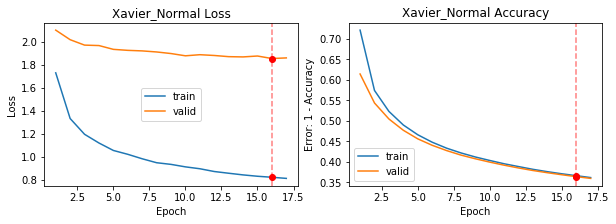

(Evaluate_Result) Loss: 1.8531, accuracy: 0.6405


In [19]:
# Xavier_Normal : GlorotNormal
prob4_cnn_xavier = TrainningModel(CNN_01_Best(initializer=tf.initializers.GlorotNormal()))
prob4_cnn_xavier.compile(optimizer = tf.optimizers.Adam(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob4_cnn_xavier.fit(train_dataset, valid_dataset, early_stopping=4)
prob4_cnn_xavier.evaluate_plot(title='Xavier_Normal')
prob4_cnn_xavier.evaluate(test_dataset)

epoch:     1, train_loss: 1.82, valid_loss: 2.10, train_accuracy: 0.25, valid_accuracy: 0.36
epoch:     2, train_loss: 1.36, valid_loss: 2.03, train_accuracy: 0.40, valid_accuracy: 0.44
epoch:     3, train_loss: 1.21, valid_loss: 1.98, train_accuracy: 0.46, valid_accuracy: 0.48
epoch:     4, train_loss: 1.11, valid_loss: 1.95, train_accuracy: 0.50, valid_accuracy: 0.51
epoch:     5, train_loss: 1.05, valid_loss: 1.94, train_accuracy: 0.53, valid_accuracy: 0.54
epoch:     7, train_loss: 0.98, valid_loss: 1.90, train_accuracy: 0.56, valid_accuracy: 0.57
epoch:     9, train_loss: 0.91, valid_loss: 1.88, train_accuracy: 0.59, valid_accuracy: 0.59 *
epoch:    10, train_loss: 0.90, valid_loss: 1.89, train_accuracy: 0.60, valid_accuracy: 0.60
epoch:    13, train_loss: 0.87, valid_loss: 1.88, train_accuracy: 0.62, valid_accuracy: 0.62
epoch:    17, train_loss: 0.81, valid_loss: 1.86, train_accuracy: 0.64, valid_accuracy: 0.64
epoch:    18, train_loss: 0.81, valid_loss: 1.86, train_accuracy: 0.

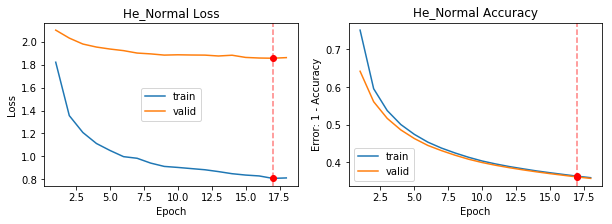

(Evaluate_Result) Loss: 1.8523, accuracy: 0.6431


In [20]:
# He_Normal : he_normal
prob4_cnn_heno = TrainningModel(CNN_01_Best(initializer=tf.initializers.he_normal()))
prob4_cnn_heno.compile(optimizer = tf.optimizers.Adam(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob4_cnn_heno.fit(train_dataset, valid_dataset, early_stopping=4)
prob4_cnn_heno.evaluate_plot(title='He_Normal')
prob4_cnn_heno.evaluate(test_dataset)

#### → best_initializer: Xavier_Normal
#### Standard_normal initializer 대비하여 Xavier_Normal과 He_Normal Initaializer가 Test_data Loss가 낮고, Accuracy가 높은 좋은 성능을 확인할 수 있었다. Xavier_Normal 방법과 He_Normal방법중에서는 Xavier_Normal 방법이 약간 더 우수한 성능을 확인하였으나, 그 차이가 크지는 않았다.

 5) 2에서 선정한 best모델을 SGD/SGD+momentum/AdaGrad/RMSProp/Adam optimizer를 통해 학습 시키고,
 각각의 결과를 비교해 best optimizer를 선정할 것. 그 근거 또한 간단히 한글로 서술 (2점)

=========================================================================================

epoch:     1, train_loss: 2.30, valid_loss: 2.30, train_accuracy: 0.11, valid_accuracy: 0.12
epoch:     2, train_loss: 2.28, valid_loss: 2.30, train_accuracy: 0.13, valid_accuracy: 0.14
epoch:     3, train_loss: 2.27, valid_loss: 2.30, train_accuracy: 0.14, valid_accuracy: 0.15
epoch:     4, train_loss: 2.25, valid_loss: 2.30, train_accuracy: 0.16, valid_accuracy: 0.17
epoch:     5, train_loss: 2.23, valid_loss: 2.29, train_accuracy: 0.17, valid_accuracy: 0.18
epoch:     7, train_loss: 2.19, valid_loss: 2.29, train_accuracy: 0.19, valid_accuracy: 0.20
epoch:    10, train_loss: 2.10, valid_loss: 2.27, train_accuracy: 0.21, valid_accuracy: 0.22
epoch:    13, train_loss: 2.02, valid_loss: 2.25, train_accuracy: 0.23, valid_accuracy: 0.23
epoch:    17, train_loss: 1.96, valid_loss: 2.24, train_accuracy: 0.25, valid_accuracy: 0.25
epoch:    23, train_loss: 1.87, valid_loss: 2.22, train_accuracy: 0.27, valid_accuracy: 0.27
epoch:    31, train_loss: 1.74, valid_loss: 2.18, train_accuracy: 0.29

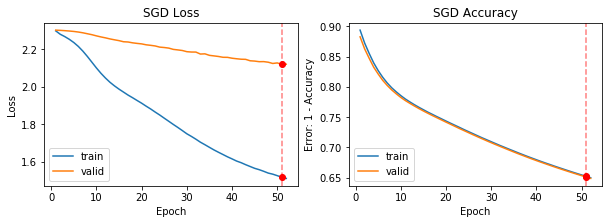

(Evaluate_Result) Loss: 2.1165, accuracy: 0.3519


In [21]:
# SGD
prob5_cnn_sgd = TrainningModel(CNN_01_Best(initializer=tf.initializers.GlorotNormal()))
prob5_cnn_sgd.compile(optimizer = tf.optimizers.SGD(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob5_cnn_sgd.fit(train_dataset, valid_dataset, early_stopping=4)
prob5_cnn_sgd.evaluate_plot(title='SGD')
prob5_cnn_sgd.evaluate(test_dataset)

epoch:     1, train_loss: 2.26, valid_loss: 2.29, train_accuracy: 0.15, valid_accuracy: 0.19
epoch:     2, train_loss: 2.08, valid_loss: 2.24, train_accuracy: 0.21, valid_accuracy: 0.23
epoch:     3, train_loss: 1.89, valid_loss: 2.20, train_accuracy: 0.25, valid_accuracy: 0.27
epoch:     4, train_loss: 1.77, valid_loss: 2.18, train_accuracy: 0.28, valid_accuracy: 0.29
epoch:     5, train_loss: 1.67, valid_loss: 2.15, train_accuracy: 0.30, valid_accuracy: 0.31
epoch:     7, train_loss: 1.52, valid_loss: 2.11, train_accuracy: 0.34, valid_accuracy: 0.35
epoch:    10, train_loss: 1.39, valid_loss: 2.06, train_accuracy: 0.39, valid_accuracy: 0.39
epoch:    13, train_loss: 1.29, valid_loss: 2.03, train_accuracy: 0.42, valid_accuracy: 0.43
epoch:    17, train_loss: 1.20, valid_loss: 2.00, train_accuracy: 0.46, valid_accuracy: 0.46
epoch:    19, train_loss: 1.16, valid_loss: 1.98, train_accuracy: 0.47, valid_accuracy: 0.47 *
epoch:    23, train_loss: 1.09, valid_loss: 1.96, train_accuracy: 0.

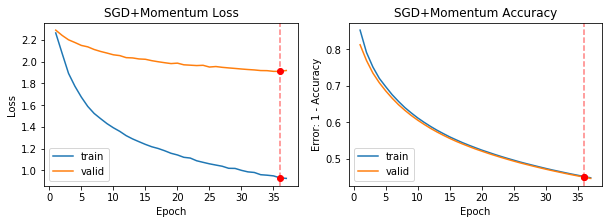

(Evaluate_Result) Loss: 1.9006, accuracy: 0.5547


In [22]:
# SGD + Momentum
prob5_cnn_sgd_moemtum = TrainningModel(CNN_01_Best(initializer=tf.initializers.GlorotNormal()))
prob5_cnn_sgd_moemtum.compile(optimizer = tf.optimizers.SGD(0.005, momentum=0.9),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob5_cnn_sgd_moemtum.fit(train_dataset, valid_dataset, early_stopping=4)
prob5_cnn_sgd_moemtum.evaluate_plot(title='SGD+Momentum')
prob5_cnn_sgd_moemtum.evaluate(test_dataset)

epoch:     1, train_loss: 2.29, valid_loss: 2.30, train_accuracy: 0.12, valid_accuracy: 0.15
epoch:     2, train_loss: 2.26, valid_loss: 2.30, train_accuracy: 0.16, valid_accuracy: 0.18
epoch:     3, train_loss: 2.21, valid_loss: 2.29, train_accuracy: 0.19, valid_accuracy: 0.20
epoch:     4, train_loss: 2.13, valid_loss: 2.27, train_accuracy: 0.21, valid_accuracy: 0.22
epoch:     5, train_loss: 2.05, valid_loss: 2.26, train_accuracy: 0.22, valid_accuracy: 0.23
epoch:     7, train_loss: 1.95, valid_loss: 2.24, train_accuracy: 0.24, valid_accuracy: 0.25
epoch:    10, train_loss: 1.84, valid_loss: 2.21, train_accuracy: 0.27, valid_accuracy: 0.28
epoch:    13, train_loss: 1.75, valid_loss: 2.19, train_accuracy: 0.30, valid_accuracy: 0.30
epoch:    17, train_loss: 1.65, valid_loss: 2.16, train_accuracy: 0.32, valid_accuracy: 0.33
epoch:    18, train_loss: 1.63, valid_loss: 2.15, train_accuracy: 0.33, valid_accuracy: 0.33 *
epoch:    23, train_loss: 1.56, valid_loss: 2.13, train_accuracy: 0.

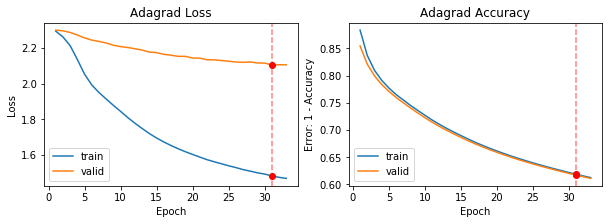

(Evaluate_Result) Loss: 2.1027, accuracy: 0.3894


In [23]:
# AdaGrad
prob5_cnn_adagrad = TrainningModel(CNN_01_Best(initializer=tf.initializers.GlorotNormal()))
prob5_cnn_adagrad.compile(optimizer = tf.optimizers.Adagrad(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob5_cnn_adagrad.fit(train_dataset, valid_dataset, early_stopping=4)
prob5_cnn_adagrad.evaluate_plot(title='Adagrad')
prob5_cnn_adagrad.evaluate(test_dataset)

epoch:     1, train_loss: 1.96, valid_loss: 2.15, train_accuracy: 0.21, valid_accuracy: 0.30
epoch:     2, train_loss: 1.57, valid_loss: 2.10, train_accuracy: 0.34, valid_accuracy: 0.37
epoch:     3, train_loss: 1.38, valid_loss: 2.06, train_accuracy: 0.39, valid_accuracy: 0.41
epoch:     4, train_loss: 1.28, valid_loss: 2.06, train_accuracy: 0.43, valid_accuracy: 0.44
epoch:     5, train_loss: 1.20, valid_loss: 2.01, train_accuracy: 0.46, valid_accuracy: 0.47
epoch:     7, train_loss: 1.10, valid_loss: 1.97, train_accuracy: 0.50, valid_accuracy: 0.50
epoch:     7, train_loss: 1.10, valid_loss: 1.97, train_accuracy: 0.50, valid_accuracy: 0.50 *
epoch:    10, train_loss: 1.00, valid_loss: 1.93, train_accuracy: 0.53, valid_accuracy: 0.54
epoch:    10, train_loss: 1.00, valid_loss: 1.93, train_accuracy: 0.53, valid_accuracy: 0.54 * best model
epoch:    12, train_loss: 0.95, valid_loss: 1.94, train_accuracy: 0.55, valid_accuracy: 0.56


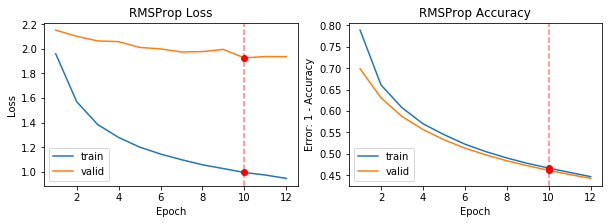

(Evaluate_Result) Loss: 1.9138, accuracy: 0.5582


In [24]:
# RMSProp
prob5_cnn_rmsprop = TrainningModel(CNN_01_Best(initializer=tf.initializers.GlorotNormal()))
prob5_cnn_rmsprop.compile(optimizer = tf.optimizers.RMSprop(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob5_cnn_rmsprop.fit(train_dataset, valid_dataset, early_stopping=4)
prob5_cnn_rmsprop.evaluate_plot(title='RMSProp')
prob5_cnn_rmsprop.evaluate(test_dataset)

epoch:     1, train_loss: 1.79, valid_loss: 2.12, train_accuracy: 0.26, valid_accuracy: 0.36
epoch:     2, train_loss: 1.41, valid_loss: 2.05, train_accuracy: 0.40, valid_accuracy: 0.43
epoch:     3, train_loss: 1.27, valid_loss: 2.01, train_accuracy: 0.45, valid_accuracy: 0.47
epoch:     4, train_loss: 1.20, valid_loss: 1.99, train_accuracy: 0.48, valid_accuracy: 0.50
epoch:     5, train_loss: 1.14, valid_loss: 1.97, train_accuracy: 0.51, valid_accuracy: 0.52
epoch:     7, train_loss: 1.07, valid_loss: 1.93, train_accuracy: 0.54, valid_accuracy: 0.54
epoch:     9, train_loss: 1.02, valid_loss: 1.92, train_accuracy: 0.56, valid_accuracy: 0.56 *
epoch:    10, train_loss: 0.99, valid_loss: 1.93, train_accuracy: 0.57, valid_accuracy: 0.57
epoch:    13, train_loss: 0.94, valid_loss: 1.91, train_accuracy: 0.59, valid_accuracy: 0.59
epoch:    14, train_loss: 0.93, valid_loss: 1.89, train_accuracy: 0.60, valid_accuracy: 0.60 *
epoch:    17, train_loss: 0.88, valid_loss: 1.88, train_accuracy: 

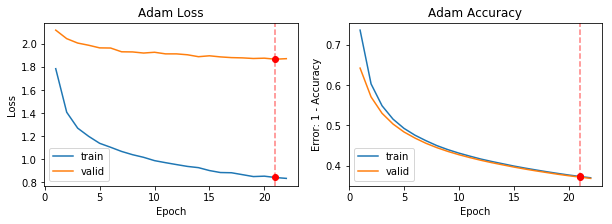

(Evaluate_Result) Loss: 1.8660, accuracy: 0.6316


In [25]:
# Adam
prob5_cnn_adam = TrainningModel(CNN_01_Best(initializer=tf.initializers.GlorotNormal()))
prob5_cnn_adam.compile(optimizer = tf.optimizers.Adam(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob5_cnn_adam.fit(train_dataset, valid_dataset, early_stopping=4)
prob5_cnn_adam.evaluate_plot(title='Adam')
prob5_cnn_adam.evaluate(test_dataset)

#### → best_optimizer: Adam
#### 다른 optimizer대비하여 Adam 방법이 Test_dataset에서 Loss값이 가장 낮고 Accuracy값이 가장 높은  가장 좋은 성능을 확인하였다.
#### optimizer별 성능차이는 Adam > RmsProp ≒ SGD+Momentum > SGD ≒ Adagrad 으로 분류할 수 있었다.

=========================================================================================

6) Test error를 낮추는 다양한 방법을 적용해 Test accuracy를 55% 이상 으로 올릴것
(ensemble / weight decay / batch normalization 등 다양한 방법 적용 가능). 
Test accuracy를 올리기 위해 사용한 방법에 대해서도 간단히 정리하여 서술. 만약 다양한
방법을 적용해 보았는데도 55% 이상의 Test accuracy가 나오지 않는다면, 
Test error를 낮추기 위해 세 가지 이상의 방법을 사용한 과정과 그때의 
Test accuracy를 정리하여 서 술 할 것 (3점)

In [26]:
# WeightDecay
class CNN01_Best_WeightDecay(tf.keras.Model):
    def __init__(self):
        super(CNN01_Best_WeightDecay, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, 
                kernel_regularizer=tf.keras.regularizers.l1_l2(),
                kernel_initializer=tf.initializers.GlorotNormal(), padding='same', activation=tf.nn.relu)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, 
                kernel_regularizer=tf.keras.regularizers.l1_l2(),
                kernel_initializer=tf.initializers.GlorotNormal(), padding='same', activation=tf.nn.relu)
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=10)

    def call(self, x, training=False, print_shape=False):
        input_data = x
        conv1 = self.conv1(input_data)
        pool1 = self.pool1(conv1)
        conv2 = self.conv2(pool1)
        pool2 = self.pool2(conv2)
        flatten = self.flatten(pool2)      
        output = self.dense1(flatten)

        if not training:
            output = tf.nn.softmax(output)
            if print_shape:
                print(f'output: {output.shape}')
        return output

# BatchNormal
class CNN01_Best_BatchNormal(tf.keras.Model):
    def __init__(self):
        super(CNN01_Best_BatchNormal, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, 
                kernel_initializer=tf.initializers.GlorotNormal(), padding='same')
        self.batchnorm1 = tf.keras.layers.BatchNormalization()
        self.activation1 = tf.keras.layers.Activation(tf.nn.relu)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, 
                kernel_initializer=tf.initializers.GlorotNormal(), padding='same')
        self.batchnorm2 = tf.keras.layers.BatchNormalization()
        self.activation2 = tf.keras.layers.Activation(tf.nn.relu)    
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=10)

    def call(self, x, training=False, print_shape=False):
        input_data = x
        conv1 = self.conv1(input_data)
        batchnorm1 = self.batchnorm1(conv1, training=training)
        activation1 = self.activation1(batchnorm1)
        pool1 = self.pool1(activation1)
        
        conv2 = self.conv2(pool1)
        batchnorm2 = self.batchnorm2(conv2, training=training)
        activation2 = self.activation2(batchnorm2)
        pool2 = self.pool2(activation2)
        flatten = self.flatten(pool2)      
        output = self.dense1(flatten)

        if not training:
            output = tf.nn.softmax(output)
            if print_shape:
                print(f'output: {output.shape}')
        return output

# DropOut
class CNN01_Best_DropOut(tf.keras.Model):
    def __init__(self):
        super(CNN01_Best_DropOut, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, 
                kernel_initializer=tf.initializers.GlorotNormal(), padding='same', activation=tf.nn.relu)
        self.dropout1 = tf.keras.layers.Dropout(0.5)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, 
                kernel_initializer=tf.initializers.GlorotNormal(), padding='same', activation=tf.nn.relu)
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=10)

    def call(self, x, training=False, print_shape=False):
        input_data = x
        conv1 = self.conv1(input_data)
        dropout1 = self.dropout1(conv1, training=training)
        pool1 = self.pool1(dropout1)
        conv2 = self.conv2(pool1)
        dropout2 = self.dropout2(conv2, training=training)
        pool2 = self.pool2(dropout2)
        flatten = self.flatten(pool2)      
        output = self.dense1(flatten)

        if not training:
            output = tf.nn.softmax(output)
            if print_shape:
                print(f'output: {output.shape}')
        return output

# WeightDecay + BatchNormal
class CNN01_Best_WeightDecayBatchNormal(tf.keras.Model):
    def __init__(self):
        super(CNN01_Best_WeightDecayBatchNormal, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, 
                kernel_regularizer=tf.keras.regularizers.l1_l2(),
                kernel_initializer=tf.initializers.GlorotNormal(), padding='same')
        self.batchnorm1 = tf.keras.layers.BatchNormalization()
        self.activation1 = tf.keras.layers.Activation(tf.nn.relu)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, 
                kernel_regularizer=tf.keras.regularizers.l1_l2(),
                kernel_initializer=tf.initializers.GlorotNormal(), padding='same')
        self.batchnorm2 = tf.keras.layers.BatchNormalization()
        self.activation2 = tf.keras.layers.Activation(tf.nn.relu)    
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=10)

    def call(self, x, training=False, print_shape=False):
        input_data = x
        conv1 = self.conv1(input_data)
        batchnorm1 = self.batchnorm1(conv1, training=training)
        activation1 = self.activation1(batchnorm1)
        pool1 = self.pool1(activation1)
        
        conv2 = self.conv2(pool1)
        batchnorm2 = self.batchnorm2(conv2, training=training)
        activation2 = self.activation2(batchnorm2)
        pool2 = self.pool2(activation2)
        flatten = self.flatten(pool2)      
        output = self.dense1(flatten)

        if not training:
            output = tf.nn.softmax(output)
            if print_shape:
                print(f'output: {output.shape}')
        return output

# WeightDecay + DropOut
class CNN01_Best_WeightDecayDropOut(tf.keras.Model):
    def __init__(self):
        super(CNN01_Best_WeightDecayDropOut, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, 
                kernel_regularizer=tf.keras.regularizers.l1_l2(),
                kernel_initializer=tf.initializers.GlorotNormal(), padding='same', activation=tf.nn.relu)
        self.dropout1 = tf.keras.layers.Dropout(0.5)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1,
                kernel_regularizer=tf.keras.regularizers.l1_l2(), 
                kernel_initializer=tf.initializers.GlorotNormal(), padding='same', activation=tf.nn.relu)
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=10)

    def call(self, x, training=False, print_shape=False):
        input_data = x
        conv1 = self.conv1(input_data)
        dropout1 = self.dropout1(conv1, training=training)
        pool1 = self.pool1(dropout1)
        conv2 = self.conv2(pool1)
        dropout2 = self.dropout2(conv2, training=training)
        pool2 = self.pool2(dropout2)
        flatten = self.flatten(pool2)      
        output = self.dense1(flatten)

        if not training:
            output = tf.nn.softmax(output)
            if print_shape:
                print(f'output: {output.shape}')
        return output

epoch:     1, train_loss: 1.68, valid_loss: 2.08, train_accuracy: 0.30, valid_accuracy: 0.40
epoch:     2, train_loss: 1.29, valid_loss: 2.02, train_accuracy: 0.45, valid_accuracy: 0.47
epoch:     3, train_loss: 1.15, valid_loss: 1.97, train_accuracy: 0.49, valid_accuracy: 0.51
epoch:     4, train_loss: 1.07, valid_loss: 1.94, train_accuracy: 0.53, valid_accuracy: 0.54
epoch:     5, train_loss: 1.00, valid_loss: 1.92, train_accuracy: 0.55, valid_accuracy: 0.56
epoch:     7, train_loss: 0.92, valid_loss: 1.89, train_accuracy: 0.59, valid_accuracy: 0.59
epoch:     9, train_loss: 0.85, valid_loss: 1.87, train_accuracy: 0.61, valid_accuracy: 0.61 *
epoch:    10, train_loss: 0.83, valid_loss: 1.87, train_accuracy: 0.62, valid_accuracy: 0.62
epoch:    13, train_loss: 0.77, valid_loss: 1.85, train_accuracy: 0.64, valid_accuracy: 0.64
epoch:    17, train_loss: 0.71, valid_loss: 1.83, train_accuracy: 0.66, valid_accuracy: 0.66
epoch:    18, train_loss: 0.71, valid_loss: 1.84, train_accuracy: 0.

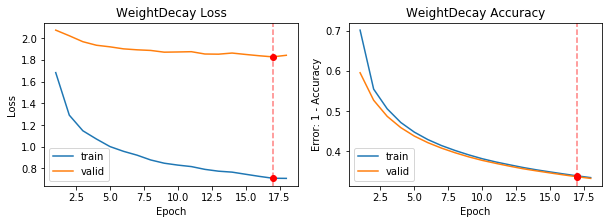

(Evaluate_Result) Loss: 1.8233, accuracy: 0.6678


In [27]:
# WeightDecay
prob6_cnn_WD = TrainningModel(CNN01_Best_WeightDecay())
prob6_cnn_WD.compile(optimizer = tf.optimizers.Adam(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob6_cnn_WD.fit(train_dataset, valid_dataset, early_stopping=4)
prob6_cnn_WD.evaluate_plot(title='WeightDecay')
prob6_cnn_WD.evaluate(test_dataset)

epoch:     1, train_loss: 1.55, valid_loss: 2.27, train_accuracy: 0.36, valid_accuracy: 0.42
epoch:     2, train_loss: 1.12, valid_loss: 2.22, train_accuracy: 0.45, valid_accuracy: 0.48
epoch:     3, train_loss: 0.99, valid_loss: 1.98, train_accuracy: 0.50, valid_accuracy: 0.52
epoch:     4, train_loss: 0.89, valid_loss: 1.90, train_accuracy: 0.54, valid_accuracy: 0.56
epoch:     5, train_loss: 0.84, valid_loss: 1.95, train_accuracy: 0.58, valid_accuracy: 0.59
epoch:     7, train_loss: 0.75, valid_loss: 1.89, train_accuracy: 0.61, valid_accuracy: 0.62
epoch:     9, train_loss: 0.69, valid_loss: 1.83, train_accuracy: 0.64, valid_accuracy: 0.64 * best model
epoch:    10, train_loss: 0.66, valid_loss: 1.83, train_accuracy: 0.65, valid_accuracy: 0.65


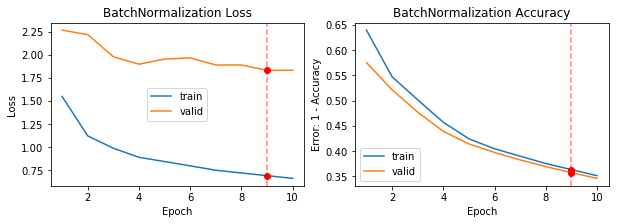

(Evaluate_Result) Loss: 1.8175, accuracy: 0.6546


In [28]:
# BatchNormal
prob6_cnn_BN = TrainningModel(CNN01_Best_BatchNormal())
prob6_cnn_BN.compile(optimizer = tf.optimizers.Adam(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob6_cnn_BN.fit(train_dataset, valid_dataset, early_stopping=4)
prob6_cnn_BN.evaluate_plot(title='BatchNormalization')
prob6_cnn_BN.evaluate(test_dataset)

epoch:     1, train_loss: 1.78, valid_loss: 2.23, train_accuracy: 0.24, valid_accuracy: 0.36
epoch:     2, train_loss: 1.41, valid_loss: 2.22, train_accuracy: 0.40, valid_accuracy: 0.42
epoch:     3, train_loss: 1.31, valid_loss: 2.19, train_accuracy: 0.44, valid_accuracy: 0.46
epoch:     4, train_loss: 1.23, valid_loss: 2.18, train_accuracy: 0.47, valid_accuracy: 0.48
epoch:     5, train_loss: 1.18, valid_loss: 2.17, train_accuracy: 0.49, valid_accuracy: 0.50
epoch:     7, train_loss: 1.11, valid_loss: 2.16, train_accuracy: 0.52, valid_accuracy: 0.53
epoch:     9, train_loss: 1.07, valid_loss: 2.14, train_accuracy: 0.54, valid_accuracy: 0.54 *
epoch:    10, train_loss: 1.06, valid_loss: 2.15, train_accuracy: 0.55, valid_accuracy: 0.55
epoch:    11, train_loss: 1.04, valid_loss: 2.13, train_accuracy: 0.55, valid_accuracy: 0.56 *
epoch:    11, train_loss: 1.04, valid_loss: 2.13, train_accuracy: 0.55, valid_accuracy: 0.56 *
epoch:    13, train_loss: 1.02, valid_loss: 2.13, train_accuracy

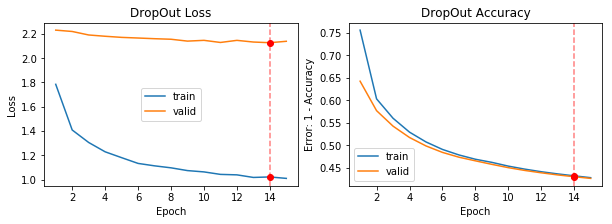

(Evaluate_Result) Loss: 2.1266, accuracy: 0.5735


In [29]:
# DropOut
prob6_cnn_DO = TrainningModel(CNN01_Best_DropOut())
prob6_cnn_DO.compile(optimizer = tf.optimizers.Adam(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob6_cnn_DO.fit(train_dataset, valid_dataset, early_stopping=4)
prob6_cnn_DO.evaluate_plot(title='DropOut')
prob6_cnn_DO.evaluate(test_dataset)

epoch:     1, train_loss: 1.56, valid_loss: 2.28, train_accuracy: 0.35, valid_accuracy: 0.41
epoch:     2, train_loss: 1.11, valid_loss: 2.19, train_accuracy: 0.44, valid_accuracy: 0.48
epoch:     3, train_loss: 0.97, valid_loss: 1.99, train_accuracy: 0.50, valid_accuracy: 0.53
epoch:     4, train_loss: 0.89, valid_loss: 1.92, train_accuracy: 0.55, valid_accuracy: 0.56
epoch:     5, train_loss: 0.85, valid_loss: 1.88, train_accuracy: 0.58, valid_accuracy: 0.59
epoch:     7, train_loss: 0.77, valid_loss: 1.88, train_accuracy: 0.62, valid_accuracy: 0.62
epoch:     8, train_loss: 0.72, valid_loss: 1.86, train_accuracy: 0.63, valid_accuracy: 0.64 *
epoch:     8, train_loss: 0.72, valid_loss: 1.86, train_accuracy: 0.63, valid_accuracy: 0.64 *
epoch:    10, train_loss: 0.67, valid_loss: 1.90, train_accuracy: 0.65, valid_accuracy: 0.66
epoch:     8, train_loss: 0.72, valid_loss: 1.86, train_accuracy: 0.63, valid_accuracy: 0.64 * best model
epoch:    12, train_loss: 0.63, valid_loss: 1.86, tra

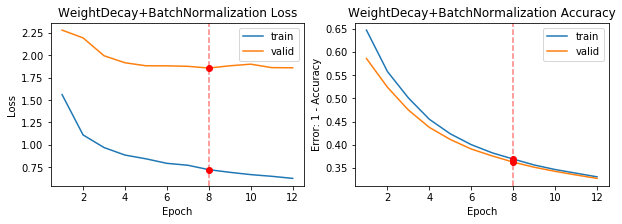

(Evaluate_Result) Loss: 1.8510, accuracy: 0.6722


In [30]:
# WeightDecay + BatchNormal
prob6_cnn_WDBN = TrainningModel(CNN01_Best_WeightDecayBatchNormal())
prob6_cnn_WDBN.compile(optimizer = tf.optimizers.Adam(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob6_cnn_WDBN.fit(train_dataset, valid_dataset, early_stopping=4)
prob6_cnn_WDBN.evaluate_plot(title='WeightDecay+BatchNormalization')
prob6_cnn_WDBN.evaluate(test_dataset)

epoch:     1, train_loss: 1.95, valid_loss: 2.26, train_accuracy: 0.21, valid_accuracy: 0.29
epoch:     2, train_loss: 1.61, valid_loss: 2.24, train_accuracy: 0.33, valid_accuracy: 0.35
epoch:     3, train_loss: 1.48, valid_loss: 2.23, train_accuracy: 0.37, valid_accuracy: 0.39
epoch:     4, train_loss: 1.40, valid_loss: 2.22, train_accuracy: 0.40, valid_accuracy: 0.41
epoch:     5, train_loss: 1.37, valid_loss: 2.20, train_accuracy: 0.41, valid_accuracy: 0.42
epoch:     7, train_loss: 1.30, valid_loss: 2.20, train_accuracy: 0.44, valid_accuracy: 0.45
epoch:    10, train_loss: 1.24, valid_loss: 2.19, train_accuracy: 0.47, valid_accuracy: 0.47
epoch:    11, train_loss: 1.21, valid_loss: 2.18, train_accuracy: 0.47, valid_accuracy: 0.48 *
epoch:    11, train_loss: 1.21, valid_loss: 2.18, train_accuracy: 0.47, valid_accuracy: 0.48 *
epoch:    13, train_loss: 1.20, valid_loss: 2.19, train_accuracy: 0.48, valid_accuracy: 0.49
epoch:    17, train_loss: 1.16, valid_loss: 2.16, train_accuracy: 

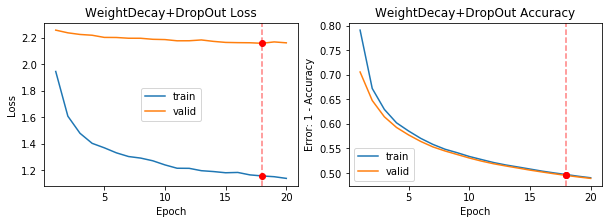

(Evaluate_Result) Loss: 2.1601, accuracy: 0.5101


In [31]:
# WeightDecay + DropOut
prob6_cnn_WDDO = TrainningModel(CNN01_Best_WeightDecayDropOut())
prob6_cnn_WDDO.compile(optimizer = tf.optimizers.Adam(0.005),
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics={'accuracy': tf.metrics.Accuracy()})
prob6_cnn_WDDO.fit(train_dataset, valid_dataset, early_stopping=4)
prob6_cnn_WDDO.evaluate_plot(title='WeightDecay+DropOut')
prob6_cnn_WDDO.evaluate(test_dataset)

#### → Best_Model: WeightDecay + BatchNormal
#### Test_Data에 대한 예측 성능을 높기이 위해, 위에서 우수한 성능을 확인한 Xavier_Normal Initializer와 Adam Optimizer를 고정적으로 사용하였고,
#### ① WeightDecay, ② BatchNormalization, ③ DropOut, ④ WeightDecay + BatchNormalization, ⑤ WeightDecay + DropOut 의 다섯가지 방법에서 Test_Data 성능을 확인하였다 (DropOut과 BatchNormalization은 성능저하를 일으키기 때문에 보통 같이 사용하지 않는다.)
#### ④ WeightDecay + BatchNormal 방법에서 Test_Data에 대해 최상의 성능을 얻을 수 있었고, Test_Accuracy 또한 67.9% 의 양호한 성능을 확인하였다.
#### 해당 데이터 셋에서는 DropOut 방법보다는 BatchNormalization방법이 Test_Data를 예측하는데 더 유리하였으며, 오히려 DropOut방법은 해당 데이터셋에서는 성능을 저하시키는 결과를 얻게 되었다.